## TP 5 : Text
# Travail réalisé par :
* Kpodjro KPATOUKPA
* Lyse Priscille NGASSEU NDIFO

In [20]:
!pip -q uninstall -y gensim numpy
!pip -q install gensim
!pip -q install sentence-transformers

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [21]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sentence_transformers import SentenceTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
stop_words = set(stopwords.words('english'))

## Q1 : Création de la collection de documents texte

In [6]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "Natural Language Processing (NLP) is a fascinating field of artificial intelligence.",
    "She didn't believe the story; however, the data suggested it was true.",
    "How many books did you buy at the bookstore for $25.50 today?",
    "The new iPhone 16 Pro Max, released in September, has a superb camera and 8GB of RAM.",
    "Amazing service! The coffee was hot and the pastries were fresh. I will definitely come back soon!"
]

print(sentences[1])


Natural Language Processing (NLP) is a fascinating field of artificial intelligence.


## Q2 : Préprocessing

In [7]:
def preprocess_text(text):
    """
    Prétraitement d'un document texte :
    - Passage en minuscules
    - Suppression des caractères spéciaux et chiffres
    - Tokenisation (séparation en mots)
    - Suppression des stopwords
    - Lemmatisation des tokens ( pour réduire la taille du vocabulaire)
    """

    # a. Passage en minuscules
    text_s = [txt.lower() for txt in text]
    text_s = " ".join(txt for txt in text_s)

    # b. Suppression des caractères spéciaux et chiffres
    text = re.sub(r"[^a-zA-Z\s]", "", text_s)

    # c. Tokenisation (séparation en mots)
    tokens = text.split()

    # d. Suppression des stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # e. Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

In [8]:
# Application de la fonction de Préprocessing
cleaned_text = preprocess_text(sentences)

In [ ]:
cleaned_text

['quick',
 'brown',
 'fox',
 'jump',
 'lazy',
 'dog',
 'natural',
 'language',
 'processing',
 'nlp',
 'fascinating',
 'field',
 'artificial',
 'intelligence',
 'didnt',
 'believe',
 'story',
 'however',
 'data',
 'suggested',
 'true',
 'many',
 'book',
 'buy',
 'bookstore',
 'today',
 'new',
 'iphone',
 'pro',
 'max',
 'released',
 'september',
 'superb',
 'camera',
 'gb',
 'ram',
 'amazing',
 'service',
 'coffee',
 'hot',
 'pastry',
 'fresh',
 'definitely',
 'come',
 'back',
 'soon']

## Q3 : Construction de la matrice Bag Of Words

In [9]:
# BOW
bow_vec = CountVectorizer()
X_bow = bow_vec.fit_transform(cleaned_text)

In [10]:
# Affichage de la matrice bow
# Matrice BoW
print("\nMatrice BoW :")
X_bow.toarray()


Matrice BoW :


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
X_bow[0].toarray().shape

(1, 46)

In [12]:
df_bow = pd.DataFrame(X_bow.toarray(), columns=bow_vec.get_feature_names_out())
print(df_bow)

    amazing  artificial  back  believe  book  bookstore  brown  buy  camera  \
0         0           0     0        0     0          0      0    0       0   
1         0           0     0        0     0          0      1    0       0   
2         0           0     0        0     0          0      0    0       0   
3         0           0     0        0     0          0      0    0       0   
4         0           0     0        0     0          0      0    0       0   
5         0           0     0        0     0          0      0    0       0   
6         0           0     0        0     0          0      0    0       0   
7         0           0     0        0     0          0      0    0       0   
8         0           0     0        0     0          0      0    0       0   
9         0           0     0        0     0          0      0    0       0   
10        0           0     0        0     0          0      0    0       0   
11        0           0     0        0     0        

## Q4 : Construction de la matrice TF-IDF

In [13]:
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(cleaned_text)

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
df_tfidf

,amazing,artificial,back,believe,book,bookstore,brown,buy,camera,coffee,...,ram,released,september,service,soon,story,suggested,superb,today,true
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Q5 : Affichage du vocabulaire extrait.

In [14]:
# Affichage du vocabulaire
vocab = bow_vec.get_feature_names_out()
print(f'Affichage vocabulaire : \n {vocab}')

Affichage vocabulaire : 
 ['amazing' 'artificial' 'back' 'believe' 'book' 'bookstore' 'brown' 'buy'
 'camera' 'coffee' 'come' 'data' 'definitely' 'didnt' 'dog' 'fascinating'
 'field' 'fox' 'fresh' 'gb' 'hot' 'however' 'intelligence' 'iphone' 'jump'
 'language' 'lazy' 'many' 'max' 'natural' 'new' 'nlp' 'pastry' 'pro'
 'processing' 'quick' 'ram' 'released' 'september' 'service' 'soon'
 'story' 'suggested' 'superb' 'today' 'true']


## Q6 : Utilisation de Word2Vec pour vectoriser les mots

In [16]:
# Préparation des données pour Word2Vec
tokenized_docs = [doc.split() for doc in vocab]

In [17]:
# Entraînement du modèle Word2Vec
model = Word2Vec(sentences=tokenized_docs, vector_size=50, window=2, min_count=1, sg=0)

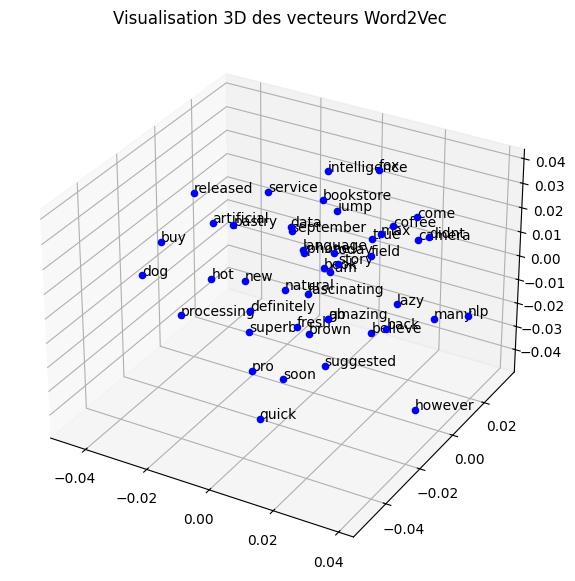

In [19]:
# Visualisation des vecteurs en 3D
# Extraire les vecteurs
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# Réduction dimensionnelle à 3D
pca = PCA(n_components=3)
word_vectors_3d = pca.fit_transform(word_vectors)

# Plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    ax.scatter(*word_vectors_3d[i], color='blue')
    ax.text(*word_vectors_3d[i], word, fontsize=10)

ax.set_title("Visualisation 3D des vecteurs Word2Vec")
plt.show()

## Q7: Génération des embeddings avec MiniLM

In [22]:
# Charger le modèle MiniLM
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# Générer les embeddings
embeddings_miniLM = model.encode(sentences)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

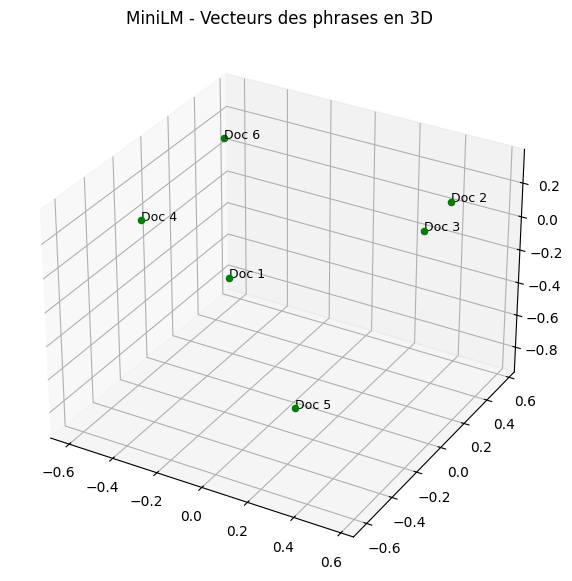

In [23]:
#PCA en 3D
embeddings_3d = PCA(n_components=3).fit_transform(embeddings_miniLM)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i, sentence in enumerate(sentences):
    ax.scatter(*embeddings_3d[i], color='green')
    ax.text(*embeddings_3d[i], f"Doc {i+1}", fontsize=9)
ax.set_title("MiniLM - Vecteurs des phrases en 3D")
plt.show()